In [97]:
import pandas as pd
# pd.options.display.max_rows = 100

import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

class Sudoku:
    
    
    def __init__(self):
        self.set_structure()
        self.create_puzzle()
    
    
    def set_structure(self):
        self.vals = np.zeros((9,9)).astype(int)
        self.rows = np.array([[i] * 9 for i in range(9)]).astype(int)
        self.cols = np.array([np.arange(0,9) for i in range(9)]).astype(int)
        self.boxs = np.array([
            np.array([np.array([[i + 0] * 3 for i in range(3)]).reshape(9)] * 3),
            np.array([np.array([[i + 3] * 3 for i in range(3)]).reshape(9)] * 3),
            np.array([np.array([[i + 6] * 3 for i in range(3)]).reshape(9)] * 3)
        ]).reshape(9,9).astype(int)
        self.vals_copy = self.vals.copy()
        
        
    def get_availability(self, num_to_place):
        val_mask = self.vals_copy == 0
        row_mask = val_mask.copy()
        col_mask = val_mask.copy()
        box_mask = val_mask.copy()
        for row in range(9):
            if (self.rows[val_mask] == row).sum() < (10 - num_to_place):
                row_mask[self.rows == row] = False    
        for col in range(9):
            if (self.cols[val_mask] == col).sum() < (10 - num_to_place):
                col_mask[self.cols == col] = False     
        for box in range(9):
            if (self.boxs[val_mask] == box).sum() < (10 - num_to_place):
                box_mask[self.boxs == box] = False
        return row_mask & col_mask & box_mask
    
    
    def create_puzzle(self):
        self.solved = False
        while self.solved == False:
            if (self.vals == 0).sum() == 9:
                self.vals[self.vals == 0] = 9
                if self.vals.sum() == 405:
                    self.solved = True
                    break

            for i in range(8):
                num_to_place = i+1
                commit = False
                counter = 0
                while commit == False:
                    counter += 1
                    if counter > 100:
                        self.vals = np.zeros((9,9)).astype(int)
                        break
                    else:
                        self.vals_copy = self.vals.copy()

                    while ((self.vals_copy == num_to_place).sum() < 9 and
                            self.get_availability(num_to_place).sum() > 0):
                        availability = self.get_availability(num_to_place)
                        check_result = False
                        while check_result == False:
                            row = np.random.randint(9)
                            col = np.random.randint(9)
                            if availability[row,col] == True:
                                self.vals_copy[row, col] = num_to_place
                                check_result = True

                        if ((self.vals_copy == num_to_place).sum() == 9 and
                             np.max(self.vals[self.vals_copy == num_to_place]) == 0):
                            commit = True
                            self.vals = self.vals_copy
        self.solution = self.vals
        
        
    def generate_puzzle(self, difficulty):
        difficulties = {
            "Very Easy" : 0.2,
            'Easy'      : 0.4,
            "Average"   : 0.5,
            "Hard"      : 0.6,
            "Very Hard" : 0.8
        }
        del_perc = difficulties[difficulty]
        del_mask = np.random.choice(
            [0, 1], p = [del_perc, 1-del_perc],
            size = 81).reshape((9,9))
        self.puzzle = self.solution * del_mask
        
        
    def get_puzzle(self, solved = True):
        if solved == True:
            data = self.solution
        else:
            data = self.puzzle
            
        fig, ax = plt.subplots(figsize = (8,8))
        im = ax.imshow(data, cmap = "binary")

        for i in range(9):
            for j in range(9):
                if data[i, j] < 4:
                    thiscol = "black"
                else:
                    thiscol = "white"
                if data[i, j] >= 1:
                    showtext = data[i, j]
                else:
                    showtext = ""
                text = ax.text(j, i, showtext, ha="center", va="center", color=thiscol, size = 20)
        # v lines
        for dist in range(8):
            ax.axvline(dist + 0.5, 0, 1, color='grey', linewidth = 1)
        ax.axvline(2.5, 0, 1, color='black', linewidth = 5)
        ax.axvline(5.5, 0, 1, color='black', linewidth = 5)
        
        for dist in range(8):
            ax.axhline(dist + 0.5, 0, 1, color='grey', linewidth = 1)
        ax.axhline(2.5, 0, 1, color='black', linewidth = 5)
        ax.axhline(5.5, 0, 1, color='black', linewidth = 5)
        fig.tight_layout()
        plt.axis('off')
        return plt

sdk = Sudoku()

<module 'matplotlib.pyplot' from '/Users/adamandrew/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

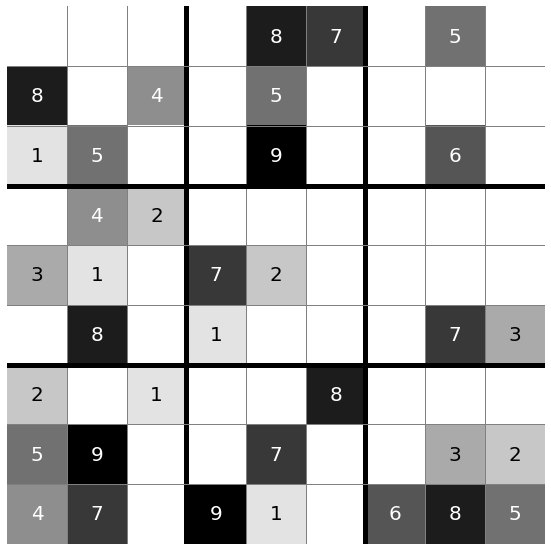

In [98]:
sdk.generate_puzzle(difficulty = "Average")
puzzle = sdk.get_puzzle(solved = False)
puzzle

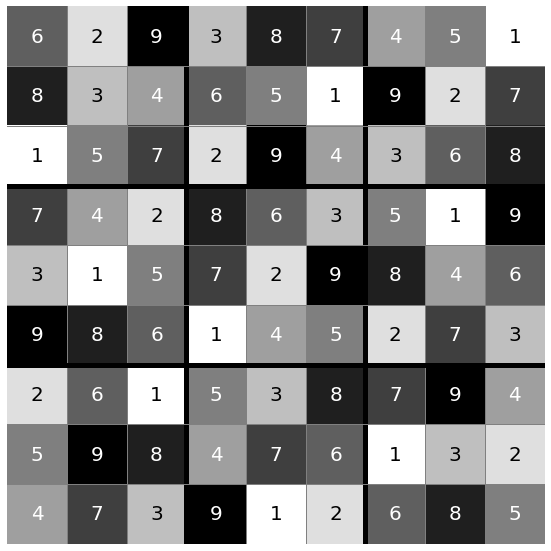

In [99]:
solved = sdk.get_puzzle(solved = True)